# 1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\Goce\Desktop\Achievement 4 Python Fundamentals'


In [3]:
# import data 
orders_products_customers_merged = pd.read_pickle(os.path.join( path, 'Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Set the max_columns option to None
pd.set_option('display.max_columns', None)


In [6]:
orders_products_customers_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last-order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,user_avg_price,spending_flag,median_prior_orders,order_frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,False,196,2,0,Soda,77,7,9.000000,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,False,196,1,1,Soda,77,7,9.000000,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,False,196,2,1,Soda,77,7,9.000000,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,False,38928,1,0,0% Greek Strained Yogurt,120,16,12.601562,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,False,38928,1,1,0% Greek Strained Yogurt,120,16,12.601562,Mid-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988281,Low spender,19.0,Regular customer,both


# 2. f you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<AxesSubplot:>

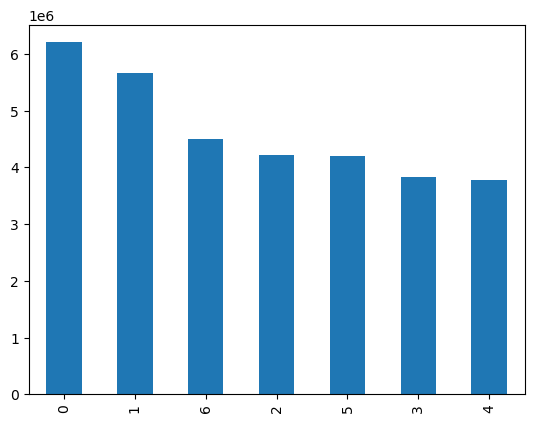

In [7]:
#Creating a bar chart in a dataframe follows a similar procedure to that of printing the frequency for a specific column
#This is just a preview of visualization
orders_products_customers_merged['orders_day_of_week'].value_counts().plot.bar()


<AxesSubplot:>

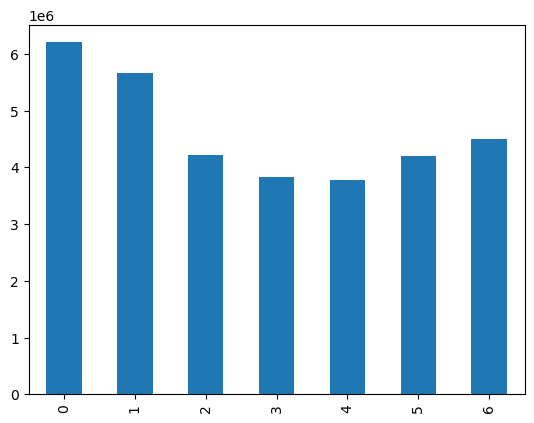

In [8]:
#sort_index() function will sort the bars in chart according to their index order (rather than largest to smallest).
orders_products_customers_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# Ensure that you always run this function on the frequency of the column in question (rather than directly on the column itself) as, otherwise, it could take considerable time to produce the chart.

<AxesSubplot:>

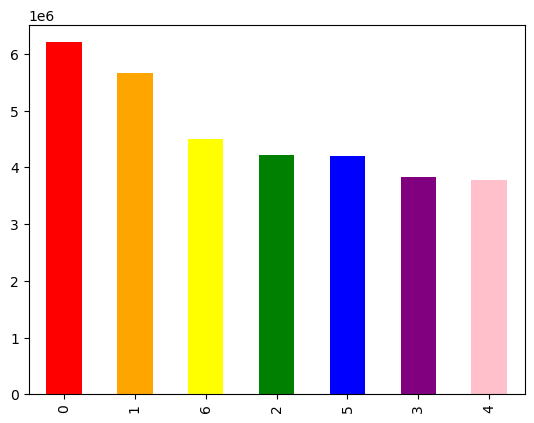

In [11]:
#adding color
orders_products_customers_merged['orders_day_of_week'].value_counts().plot.bar(color=['red','orange','yellow','green','blue','purple','pink'])

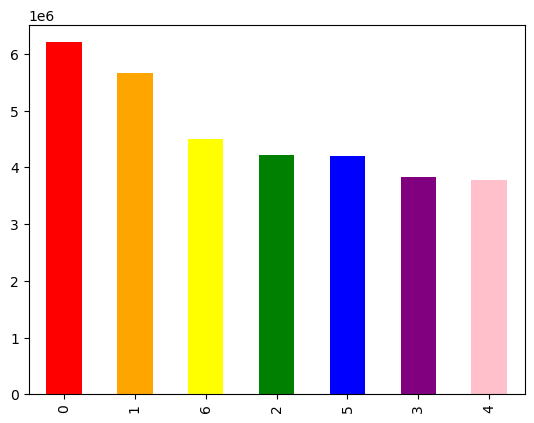

In [13]:
# The code you used above generated a preview for your visualization but didn’t actually save it in Jupyter’s memory. You’ll need to update your command to change this:
bar = orders_products_customers_merged['orders_day_of_week'].value_counts().plot.bar(color=['red','orange','yellow','green','blue','purple','pink'])

In [14]:
#Now bar chart has been saved within the bar object, and you’ll be able to access it any time you like by calling bar.figure

In [15]:
# Exporting Charts
bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

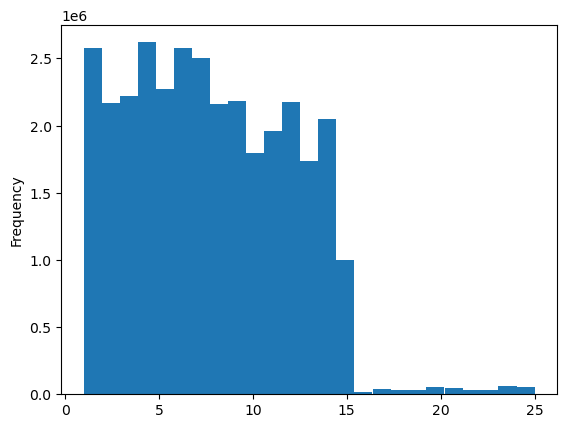

In [16]:
# create histogram (view only)
orders_products_customers_merged['prices'].plot.hist(bins = 25)

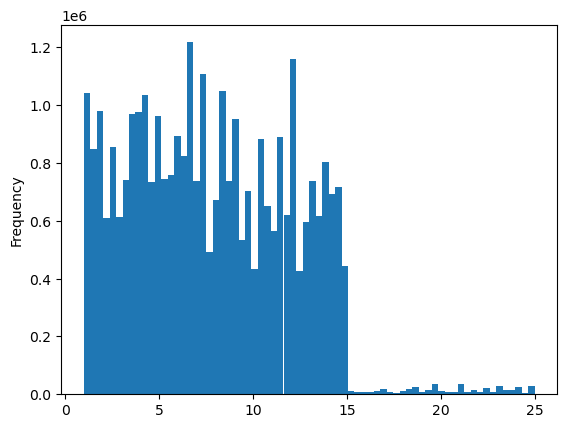

In [17]:
# create histogram with increased level of granularity
hist=orders_products_customers_merged['prices'].plot.hist(bins = 70)

In [18]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations','hist_of_prices.png'))

Create sample with ranomized data in order to create line chart

In [19]:
#Set the seed for the random number generator.
#Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
#Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
#Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [20]:
np.random.seed(4)
dev = np.random.rand(len(orders_products_customers_merged)) <= 0.7

In [21]:
#store 70 % of the sample in the dataframe big
big = orders_products_customers_merged[dev]

In [22]:
# #store 30 % of the sample in the dataframe small
small = orders_products_customers_merged[~dev]

In [23]:
# checking 
len(orders_products_customers_merged)


32404859

In [24]:
len(big)+len(small)

32404859

In [25]:
# reducing  samples to only those columns necessary for the chart, namely “prices” and “orders_day_of_week.
df = small[['orders_day_of_week','prices']]

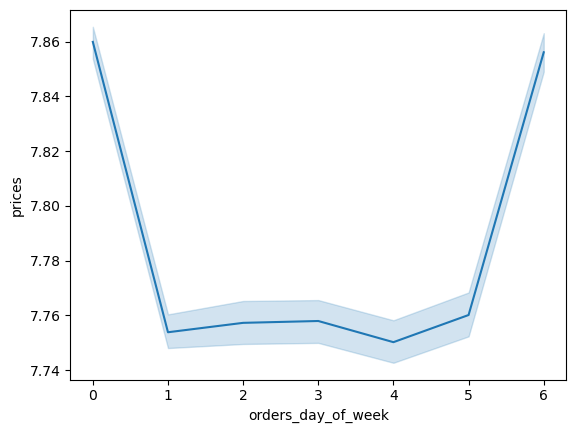

In [52]:
# creating line chart
line2 = sns.lineplot(data = df, x = 'orders_day_of_week',y = 'prices')

In [27]:
# blue bands around line are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

<AxesSubplot:xlabel='prices', ylabel='prices'>

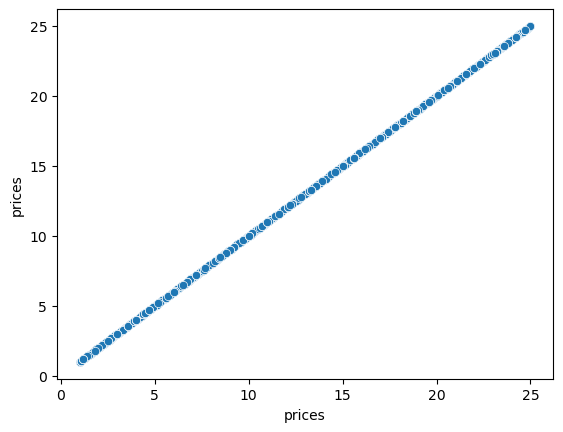

In [28]:
#creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = orders_products_customers_merged)


# 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

<AxesSubplot:ylabel='Frequency'>

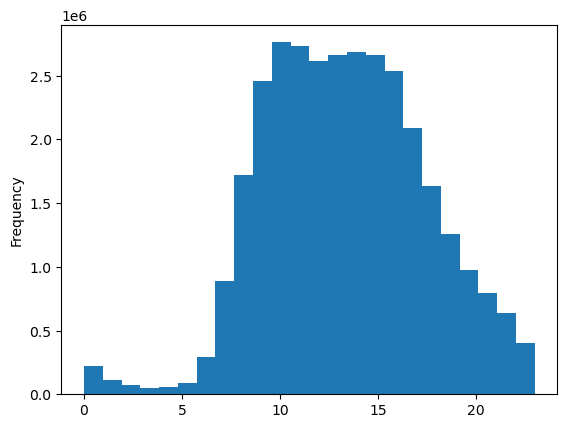

In [30]:
# create histogram (view only)
orders_products_customers_merged['order_hour_of_day'].plot.hist(bins = 24)

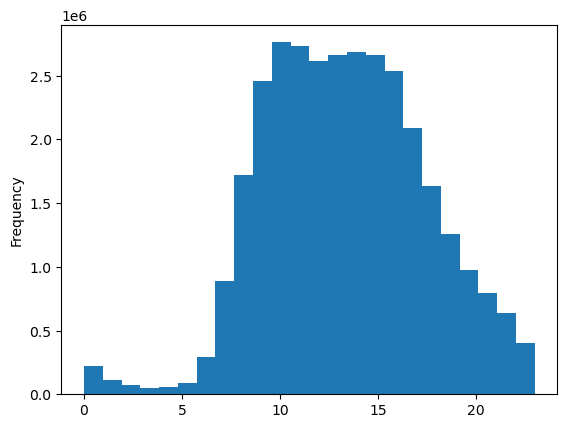

In [37]:
hist_ord_hour_days=orders_products_customers_merged['order_hour_of_day'].plot.hist(bins = 24)

The histogram represents frequency of orders during the 24 hours, with peak hours between 10 and 17h

# 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

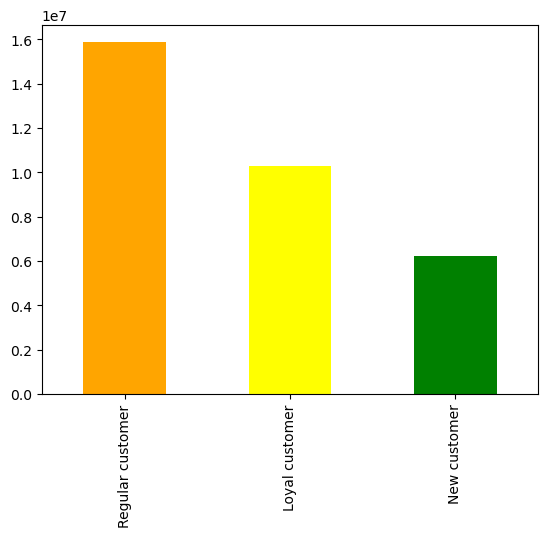

In [38]:
bar_loyalty_flag = orders_products_customers_merged['loyalty_flag'].value_counts().plot.bar(color=['orange','yellow','green'])

# 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [39]:
# reducing  samples to only those columns necessary for the chart, namely “prices” and “order_hour_of_day.
df1 = small[['order_hour_of_day','prices']]

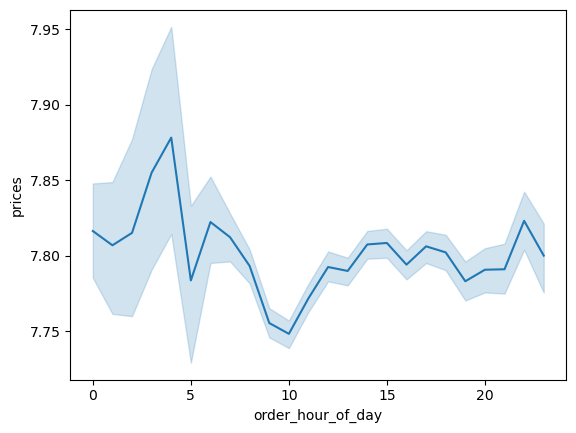

In [40]:
# creating line chart
line = sns.lineplot(data = df1, x = 'order_hour_of_day',y = 'prices')

There is no significant difference in expenditure during the day, however the highest prices are paid between 2-4 AM, the lowest around 10 AM

# 6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

In [41]:
# reducing  samples to only those columns necessary for the chart, namely “age” and “number_of_dependants".
df2 = small[['age','number_of_dependants']]

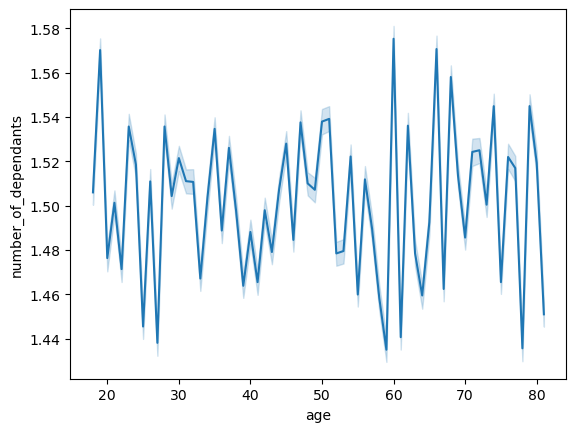

In [42]:
# creating line chart
line1 = sns.lineplot(data = df2, x = 'age',y = 'number_of_dependants')

There is no connection between the number of dependants and age.

# 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

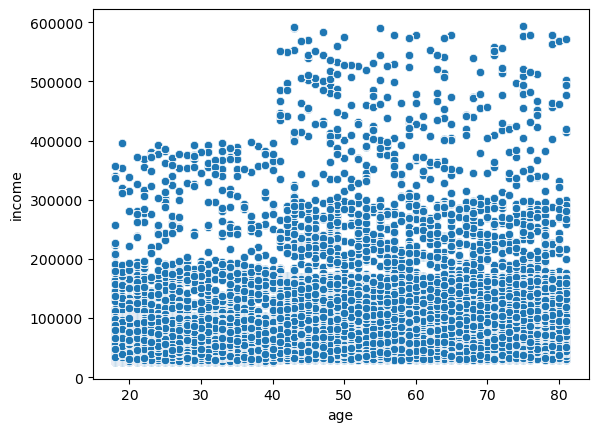

In [50]:
#creating a scatterplot
scatterplot_age_income=sns.scatterplot(x = 'age', y = 'income',data = orders_products_customers_merged)

The chart showing that most of the Instacart customers in all age groups are within the range of 200000 income. In the range 200-300.000 the highest frequency are among people over 40. Income range 300-400.000 is more equally dispersed among all age groups, while income over 400.000 is most frequent among people aged 40+.

# 8.Export your visualizations as “.png” files in your relevant project folder.

In [44]:
# Exporting  histogram of the “order_hour_of_day”
hist_ord_hour_days.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'hist_ord_hour_days.png'))

In [45]:
# Exporting  bar_loyalty_flag
bar_loyalty_flag.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [46]:
# Exporting  line chart
line.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_difference_in_expenditure.png'))

In [47]:
# Exporting  line chart1
line1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_age_dependants.png'))

In [51]:
# Exporting  scatterplot age and income
scatterplot_age_income.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatterplot_age_income.png'))

In [53]:
# Exporting  line chart2
line2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'line_days_prices.png'))